In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline


In [30]:
companies = pd.read_csv('data/b1.csv')
X = companies.iloc[:,:-1].values
Y = companies.iloc[:,4].values

X.shape

(1000, 4)

<AxesSubplot:>

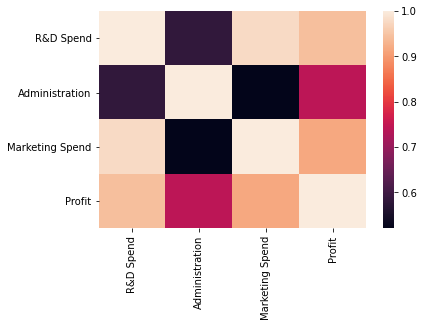

In [3]:
sns.heatmap(companies.corr())

In [26]:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
# labelencoder = LabelEncoder()
# X[:,3] = labelencoder.fit_transform(X[:,3])

from sklearn.compose import make_column_transformer
ct = make_column_transformer(
    (OneHotEncoder(), [3]),    # The column numbers to be transformed (here is [0] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)

X = ct.fit_transform(X)


array([[0.0, 0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [1.0, 0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 1.0, 0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [1.0, 0.0, 0.0, 100275.47, 241926.31, 227142.82],
       [1.0, 0.0, 0.0, 128456.23, 321652.14, 281692.32],
       [0.0, 0.0, 1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [24]:
X = X[:,1:]


array([[1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 162597.7, 151377.59, 443898.53],
       [0.0, 153441.51, 101145.55, 407934.54],
       ...,
       [0.0, 100275.47, 241926.31, 227142.82],
       [0.0, 128456.23, 321652.14, 281692.32],
       [1.0, 161181.72, 270939.86, 295442.17]], dtype=object)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [9]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [10]:

y_pred = lin_reg.predict(X_test)

In [11]:
print(lin_reg.coef_)

[-7.92323210e+02 -4.64382238e+02  5.24699015e-01  9.03445439e-01
  1.03284926e-01]


In [12]:
print(lin_reg.intercept_)

-57418.75678548415


In [13]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.920953619331005

In [15]:
X[:,3]

array([136897.8, 151377.59, 101145.55, 118671.85, 91391.77, 99814.71,
       147198.87, 145530.06, 148718.95, 108679.17, 110594.11, 91790.61,
       127320.38, 135495.07, 156547.42, 122616.84, 121597.55, 145077.58,
       114175.79, 153514.11, 113867.3, 153773.43, 122782.75, 105751.03,
       99281.34, 139553.16, 144135.98, 127864.55, 182645.56, 153032.06,
       115641.28, 152701.92, 129219.61, 103057.49, 157693.92, 85047.44,
       127056.21, 51283.14, 65947.93, 82982.09, 118546.05, 84710.77,
       96189.63, 127382.3, 154806.14, 124153.04, 115816.21, 135426.92,
       51743.15, 116983.8, 123327.9523, 116183.1212, 123739.6968,
       120128.2187, 117505.1933, 114997.5096, 121737.3896, 131712.2998,
       114485.9303, 131294.2049, 129410.636, 121778.5936, 116820.5277,
       119459.2077, 112236.9898, 129146.4284, 113851.7728, 132703.2632,
       118301.5084, 133779.8836, 116239.9797, 126963.50300000001,
       120189.9508, 123128.4304, 131102.8057, 112516.8521, 130113.0238,
       133

In [21]:
from sklearn.preprocessing import OneHotEncoder

cg = OneHotEncoder()
cg.fit_transform(companies[['State']]).toarray()

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

0        New York
1      California
2         Florida
3        New York
4         Florida
          ...    
995    California
996    California
997    California
998    California
999      New York
Name: State, Length: 1000, dtype: object